In [10]:
import networkx as nx
import re
import matplotlib.pyplot as plt
from graphviz import Digraph
from IPython.display import Image, display
import math

In [2]:
file = "test.dat"
file = "day.dat"
lines = open(file,'r').read().split('\n')
directions = lines[0]
graph_dict = dict([(match.group(1), (match.group(2), match.group(3))) 
          for l in lines[2:] if (match := re.match(r'(\w+) = \((\w+), (\w+)', l))])
start_node = 'AAA'
end_node = 'ZZZ'
directions, start_node, end_node

('LRRRLRRLLRRLRRLRRLRRLRLLRLRLLRRLRLRRRLRRLRRLLRLRLRLRRRLRRRLLRLRRRLLRRRLRLLRRRLLRRLRLRLRRRLLRRLRRRLLRRLRLRRRLLRRRLRRLRLRRRLLRRLRRRLRRLLRRLRRLRRRLRRRLRRRLRRLRRRLLRLRLRLRRRLRRLRRRLRRLRLRRLRLRRRLRRRLRRLRRRLLRRRLLRRLRLRRRLRLRLRRRLRLRLRLRRLRLRRLRRLLRRRLRLLRRLRRRLRRRLLRRLRLLLLRRLRRRR',
 'AAA',
 'ZZZ')

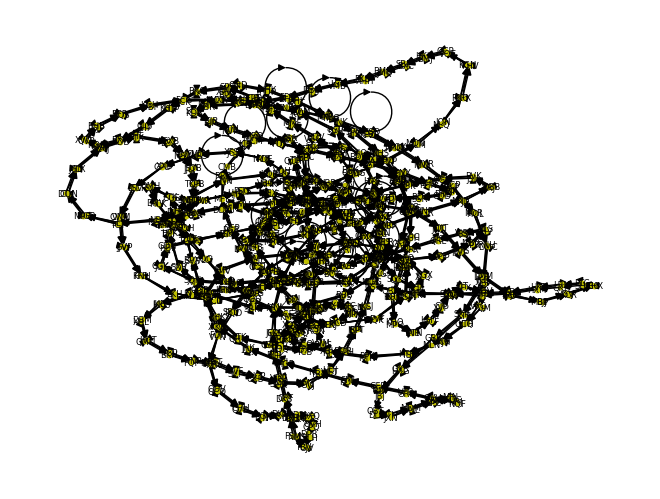

In [5]:
G = nx.DiGraph()
for node, (left, right) in graph_dict.items():
    G.add_edge(node, left)
    G.add_edge(node, right)
    G.add_edge(left, right)
nx.draw(G, with_labels=True, arrows=True, font_size=6, node_size=10, node_color='y')
plt.show()

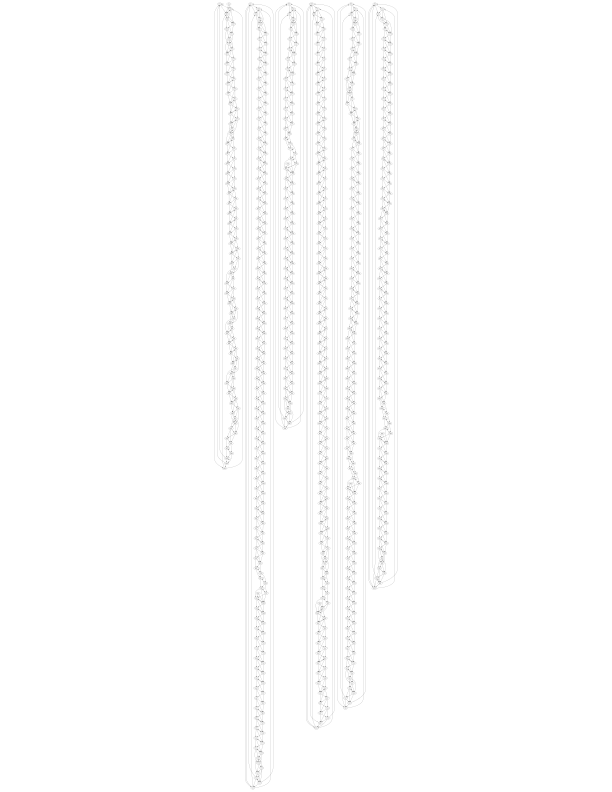

In [6]:
dot = Digraph()
for u, v in G.edges():
    dot.edge(str(u), str(v))

# dot.render('graph', view=True)  
display(Image(filename='graph.png'))

In [3]:
current_node = start_node
steps = 0
while current_node != end_node:
    print(current_node, steps)
    for d in directions:
        if d == 'L':
            current_node = graph_dict[current_node][0]
        else:
            current_node = graph_dict[current_node][1]
        steps += 1
        print(current_node, steps)

print(steps)
# 13019 is correct
# 277 is too low.

AAA 0
QRB 1
KHP 2
LFG 3
QFF 4
PHC 5
RNQ 6
LMG 7
XHG 8
MQN 9
JQN 10
DFX 11
KGN 12
QCP 13
HKK 14
BXC 15
BMN 16
XHH 17
LSP 18
FTS 19
FFS 20
HHB 21
XKS 22
BPQ 23
QND 24
HDP 25
VCT 26
HXB 27
RJS 28
MCC 29
KLK 30
CDQ 31
XGL 32
DLC 33
RBB 34
BTB 35
SBK 36
VHH 37
SXR 38
TMF 39
SNJ 40
TVF 41
XQB 42
GKR 43
LTD 44
FTJ 45
TDB 46
PGQ 47
MJB 48
VBJ 49
LFG 50
DSS 51
PHC 52
RNQ 53
LMG 54
XHG 55
TLM 56
NLQ 57
RKQ 58
KHV 59
QCP 60
HKK 61
BXC 62
BMN 63
XHH 64
VMB 65
FTS 66
SHB 67
HHB 68
XKS 69
XPV 70
SFH 71
HHK 72
VCT 73
NJJ 74
SPD 75
NHS 76
HJN 77
CDQ 78
XGL 79
DLC 80
GVS 81
BTB 82
SBK 83
CJG 84
CDV 85
TMF 86
SNJ 87
CNN 88
RLQ 89
PML 90
LTD 91
FTJ 92
TDB 93
PGQ 94
MJB 95
KHP 96
LFG 97
DSS 98
QJD 99
RNQ 100
LMG 101
XHG 102
TLM 103
JQN 104
DFX 105
KHV 106
VQT 107
HKK 108
BXC 109
BMN 110
XHH 111
VMB 112
FTS 113
FFS 114
PFH 115
XKS 116
XPV 117
SFH 118
HHK 119
GHL 120
HXB 121
RJS 122
MCC 123
KLK 124
CDQ 125
XGL 126
DLC 127
GVS 128
JDJ 129
SBK 130
VHH 131
CDV 132
TMF 133
KXT 134
CNN 135
RLQ 136
PML 137
GBP 13

Part 2

In [8]:
start_nodes = [n for n in graph_dict if n.endswith('A')]
end_nodes = [n for n in graph_dict if n.endswith('Z')]
start_nodes, end_nodes


(['MXA', 'VQA', 'CBA', 'JBA', 'AAA', 'HSA'],
 ['QMZ', 'SHZ', 'ZZZ', 'XHZ', 'KFZ', 'FXZ'])

In [12]:
steps_list = []
for s in start_nodes:
    steps = 0
    current_node = s
    while current_node not in end_nodes:
        for d in directions:
            if d == 'L':
                current_node = graph_dict[current_node][0]
            else:
                current_node = graph_dict[current_node][1]
            steps += 1
    steps_list.append(steps)
    print(steps)
steps_list

16343
11911
20221
21883
13019
19667


[16343, 11911, 20221, 21883, 13019, 19667]

In [13]:
math.lcm(*steps_list)
# answer is 13524038372771

13524038372771